<a href="https://colab.research.google.com/github/Laureoby/credit_dataset_traitement/blob/update/Loading_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [4]:
data = pd.read_csv('/content/drive/MyDrive/train_login.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#print all values in dataset
pd.set_option('display.max_rows', data.shape[0]+1)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#we verified if we have null values on dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [12]:
#fill values when it is missing
cat_data=[]
num_data=[]
for i,c in enumerate(data.dtypes):
    if c==object:
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,Semiurban,N


In [13]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.000000,NaN,360.0,1.0
1,4583.0,1508.000000,128.0,360.0,1.0
2,3000.0,0.000000,66.0,360.0,1.0
3,2583.0,2358.000000,120.0,360.0,1.0
4,6000.0,0.000000,141.0,360.0,1.0
5,5417.0,4196.000000,267.0,360.0,1.0
6,2333.0,1516.000000,95.0,360.0,1.0
7,3036.0,2504.000000,158.0,360.0,0.0
8,4006.0,1526.000000,168.0,360.0,1.0
9,12841.0,10968.000000,349.0,360.0,1.0


In [14]:
cat_data.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [15]:
#fill missing value for categoric values, we fill missing values by most values presents in each column
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [16]:
num_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [17]:
#fill missing value for numeric values by precedent value in each column
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [18]:
#now we transform values in some column
target_value={'Y':1, 'N':0}
target=cat_data['Loan_Status']
#cat_data.drop('Loan_Status', axis=1, inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
1

In [19]:
#we replace others non numeric values columns by numeric values
le=LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1
5,5,1,1,2,0,1,2,1
6,6,1,1,0,1,0,2,1
7,7,1,1,3,0,0,1,0
8,8,1,1,2,0,0,2,1
9,9,1,1,1,0,0,1,0


In [20]:
#we delete Loan_ID column
cat_data.drop('Loan_ID', axis=1, inplace=True)
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
5,1,1,2,0,1,2,1
6,1,1,0,1,0,2,1
7,1,1,3,0,0,1,0
8,1,1,2,0,0,2,1
9,1,1,1,0,0,1,0


In [21]:
#Now we mixed num_data and cat_data
data=pd.concat([cat_data, num_data], axis=1)
y=target
data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.000000,128.0,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.000000,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.000000,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.000000,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.000000,141.0,360.0,1.0
5,1,1,2,0,1,2,1,5417.0,4196.000000,267.0,360.0,1.0
6,1,1,0,1,0,2,1,2333.0,1516.000000,95.0,360.0,1.0
7,1,1,3,0,0,1,0,3036.0,2504.000000,158.0,360.0,0.0
8,1,1,2,0,0,2,1,4006.0,1526.000000,168.0,360.0,1.0
9,1,1,1,0,0,1,0,12841.0,10968.000000,349.0,360.0,1.0


After cleaning data we visualized data

In [22]:
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

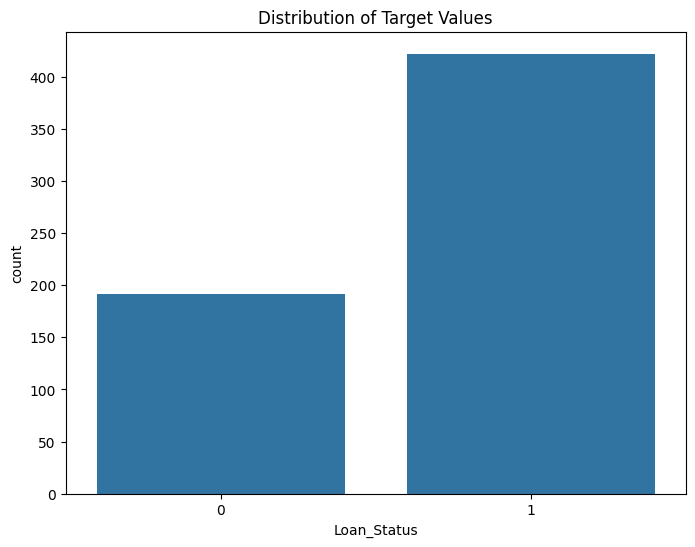

percentage of validated loans is 0.3127035830618892
percentage of refused loans is 0.3127035830618892


In [23]:
#we print histogram of target value
plt.figure(figsize=(8,6))
sns.countplot(x=target)
plt.title('Distribution of Target Values')
plt.show()

yes=target.value_counts()[0]/len(target)
no=target.value_counts()[0]/len(target)
print(f'percentage of validated loans is {yes}')
print(f'percentage of refused loans is {no}')

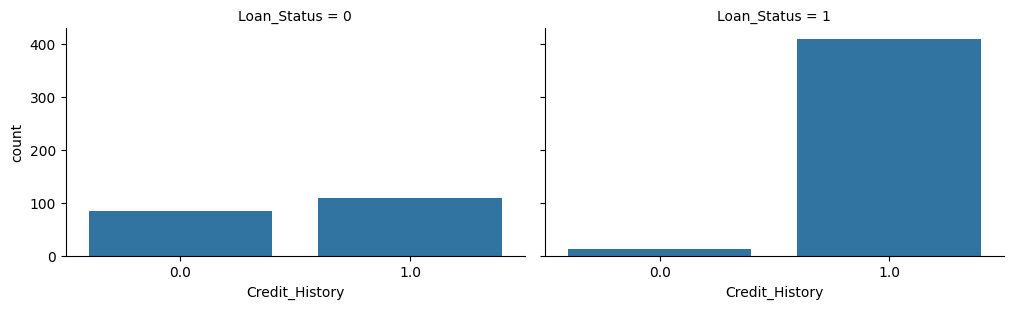

In [24]:
#Credit history
grid = sns.FacetGrid(data, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History', order=sorted(data['Credit_History'].unique()))
plt.show()

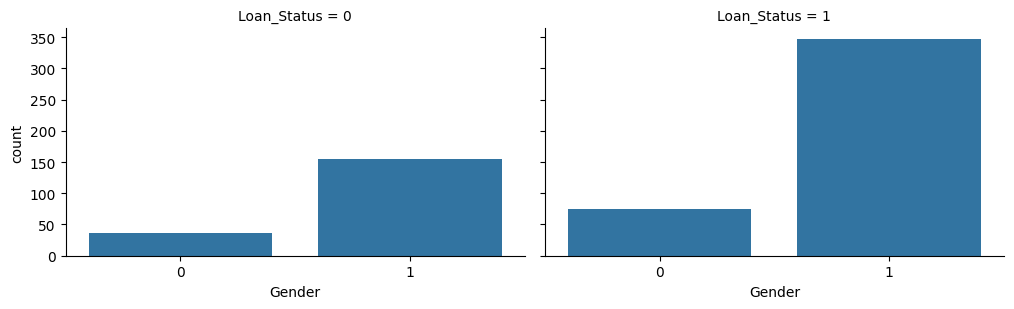

In [25]:
#Gender
grid = sns.FacetGrid(data, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender', order=sorted(data['Gender'].unique()))
plt.show()

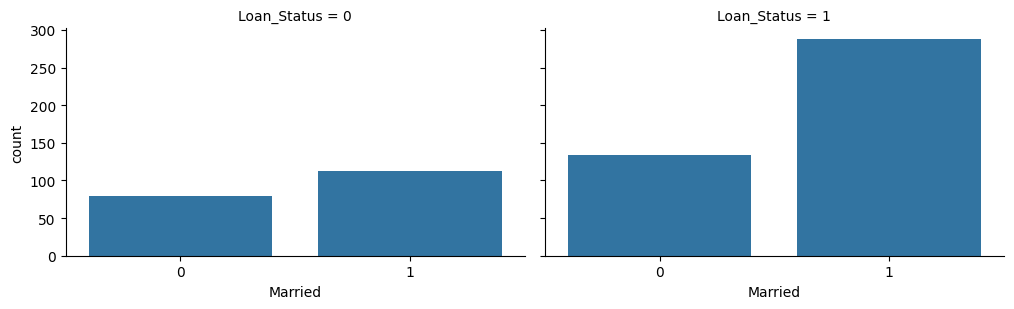

In [26]:
#Credit history
grid = sns.FacetGrid(data, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married', order=sorted(data['Married'].unique()))
plt.show()

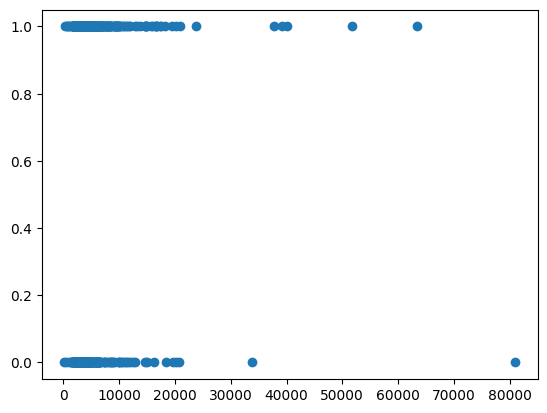

In [27]:
#revenu evaluation
plt.scatter(data['ApplicantIncome'], data['Loan_Status'])
plt.show()

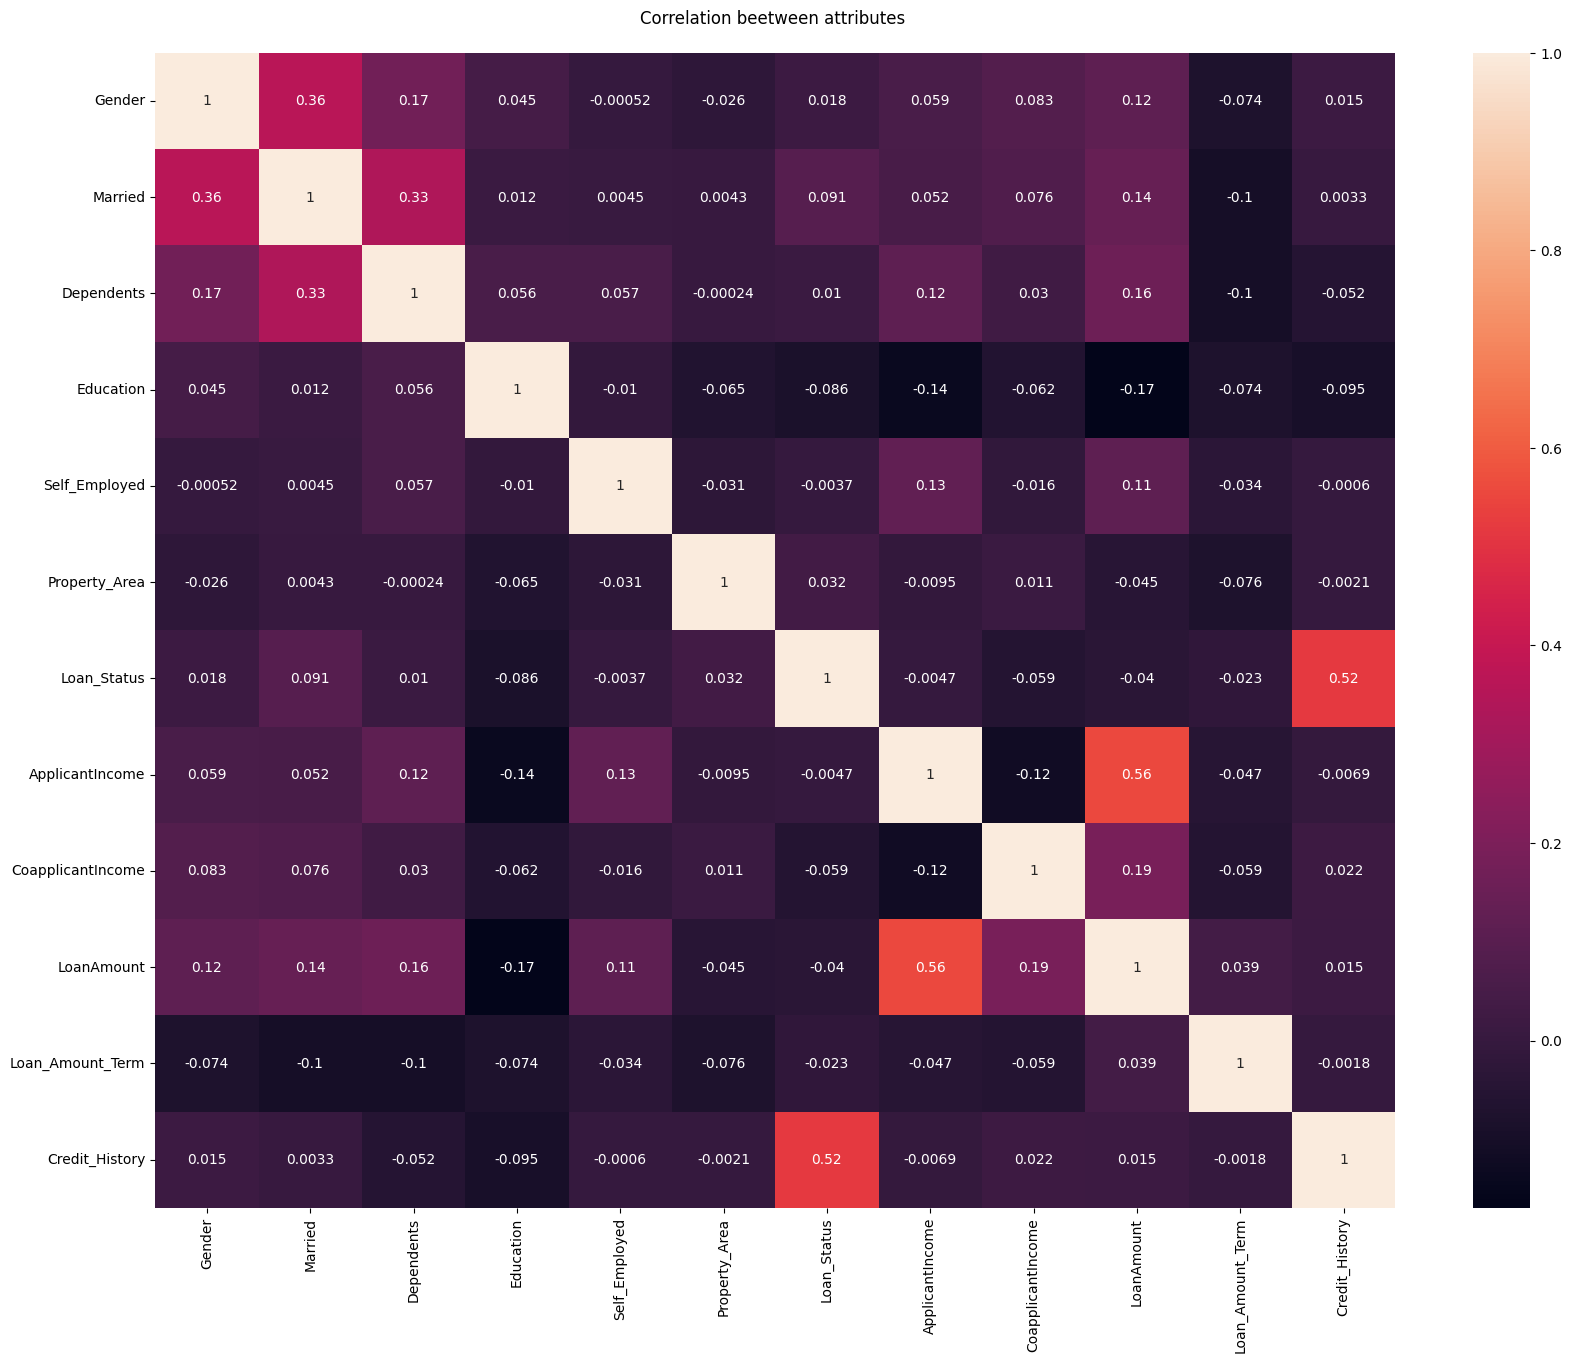

In [28]:
plt.figure(figsize=(20,15))
corelation=data.corr()
sns.heatmap(corelation,annot=True,linecolor="white")
plt.title('Correlation beetween attributes \n')
plt.show()

In [29]:
#We divided our dataset in train and test: 20% for test and 80% for train
X= data.iloc[:,1:].values
Y= data.iloc[:,0].values

In [30]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, Y_train, Y_test = split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [34]:
#We apply three algorith Linear regression, KNN, Decision tree
models={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42)
}

#precision function
def precision_function(Y_true, Y_pred, retu=False):
    acc=accuracy_score(Y_true, Y_pred)
    if retu:
        return acc
    else:
        print(f'Precision of model is: {acc}')

#evaluation model
def train_test_eval(models, X_train, Y_train, X_test, Y_test):
    for name, model in models.items():
        print(f'{name}:')
        model.fit(X_train, Y_train)
        precision_function(Y_test, model.predict(X_test))
        print('-'*30)

train_test_eval(models, X_train, Y_train, X_test, Y_test)

LogisticRegression:
Precision of model is: 0.8617886178861789
------------------------------
KNeighborsClassifier:
Precision of model is: 0.8048780487804879
------------------------------
DecisionTreeClassifier:
Precision of model is: 0.8455284552845529
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
Accuracy: 0.8617886178861789
------------------------------
KNeighborsClassifier:
Accuracy: 0.8048780487804879
------------------------------
DecisionTreeClassifier:
Accuracy: 0.8455284552845529
------------------------------


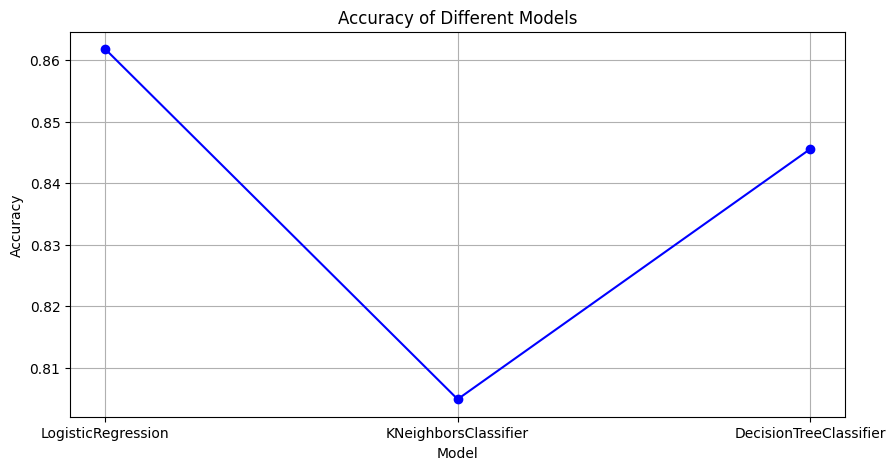

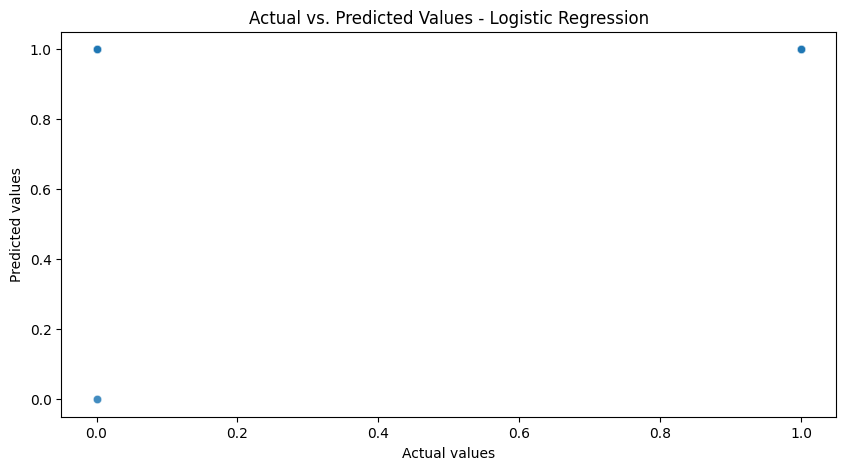

In [36]:
# New train_test_eval function with line plot for accuracies
def train_test_eval(models, X_train, Y_train, X_test, Y_test):
    accuracies = {}
    predictions = {}

    for name, model in models.items():
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = precision_function(Y_test, Y_pred, retu=True)
        accuracies[name] = accuracy
        predictions[name] = Y_pred
        print(f'{name}:')
        print(f'Accuracy: {accuracy}')
        print('-'*30)

    # Plotting the accuracies using a line plot
    plt.figure(figsize=(10, 5))
    plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o', linestyle='-', color='b')
    plt.title('Accuracy of Different Models')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.grid(True)
    plt.show()

    # Example of plotting actual vs predicted values for a specific model
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=Y_test, y=predictions['LogisticRegression'], alpha=0.6)
    plt.title('Actual vs. Predicted Values - Logistic Regression')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()

# Call the function with your data
train_test_eval(models, X_train, Y_train, X_test, Y_test)